In [1]:
using Plots, Random, LinearAlgebra, Statistics

In [2]:
"""plot line y = w*x+b"""
function plotline(w,b;
                  xmin=-100,xmax=100,label="")
    xsamples = [xmin, xmax]
    plot!(xsamples, [w*x+b for x in xsamples], color=:black, label=label)
end

plotline

In [3]:
"""plot function y=f(x)"""
function plotfunc(f;
                  xmin=-100,xmax=100,nsamples=100,label="")
    xsamples = LinRange(xmin,xmax,nsamples)
    plot!(xsamples, [f(x) for x in xsamples], color=:black, label=label)
end

plotfunc

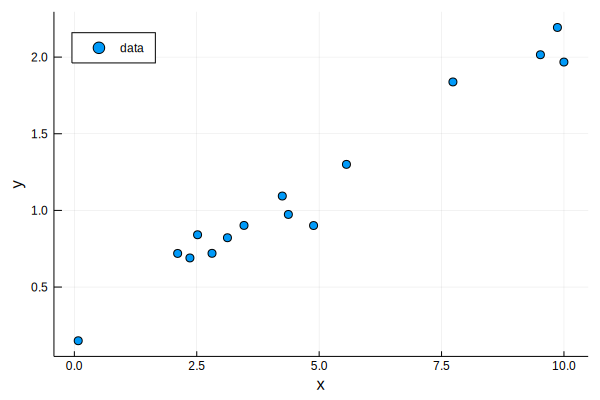

In [4]:
# Generate and plot data
Random.seed!(1)
n = 15
function sample_data(num_points)
    x = rand(num_points)*10
    y = .2 .+ .2*x + .1*sin.(x) + .1*randn(num_points) - .01*((x.-5)/6).^4
    return x,y
end
x,y = sample_data(n)

"""function to plot the above data"""
function plotdata(x=x,y=y; margin=.05)
    scatter(x,y, label="data", legend=:topleft)
    xlabel!("x")
    ylabel!("y")
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
    xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
end
plotdata()

# Approximating with the mean

In [5]:
# the mean solves a very simple least squares problem:
X = ones(n,1)
w = X\y

1-element Array{Float64,1}:
 1.1418154306154014

In [6]:
# check the solution to our least squares problem is the mean
abs(mean(y) - w[1])

0.0

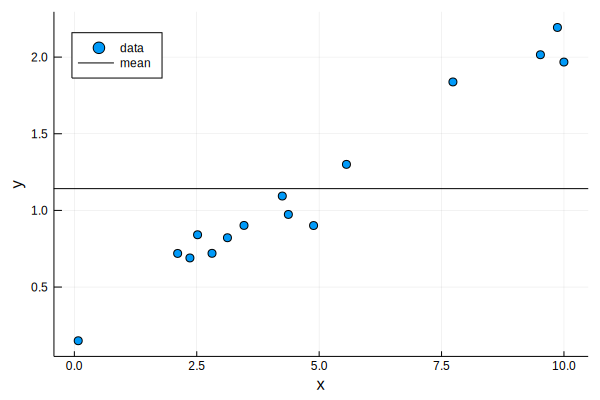

In [7]:
# plot the fit
plotdata()
plotline(0, w[1], label="mean")

# Approximating with a line

In [8]:
X = [copy(x) ones(length(x))]

15×2 Array{Float64,2}:
 2.36033    1.0
 3.46517    1.0
 3.12707    1.0
 0.0790928  1.0
 4.88613    1.0
 2.10968    1.0
 9.51916    1.0
 9.99905    1.0
 2.51662    1.0
 9.86666    1.0
 5.55751    1.0
 4.37108    1.0
 4.24718    1.0
 7.73223    1.0
 2.8119     1.0

In [9]:
w = X\y

2-element Array{Float64,1}:
 0.1889327554101744 
 0.22676530293763508

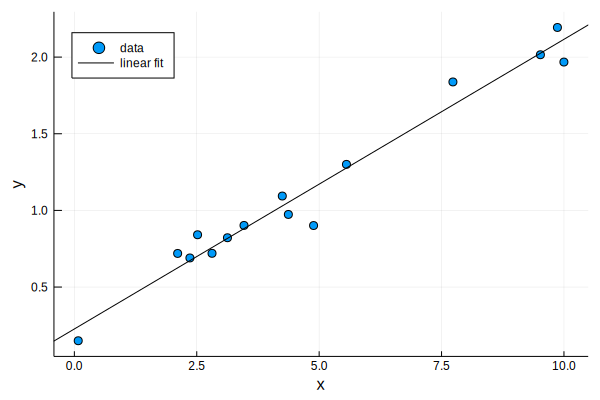

In [10]:
# plot the fit
plotdata()
plotline(w[1], w[2], label="linear fit")

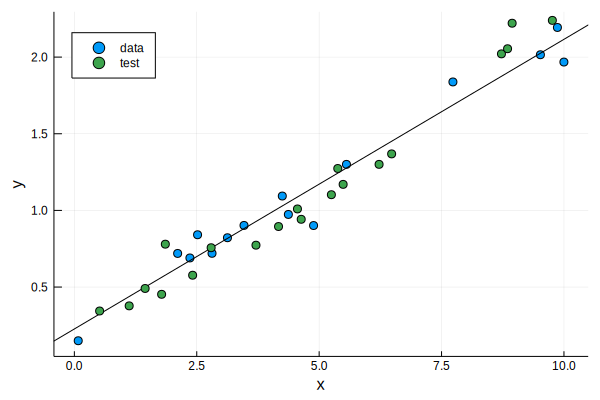

In [11]:
# plot fit on out of sample data
plotdata()
plotline(w[1], w[2])

xtest,ytest = sample_data(20)
scatter!(xtest,ytest,label="test")

# Approximating with a polynomial

In [12]:
# first, construct a Vandermonde matrix
max_order = 10

X = zeros(n, max_order+1)
for k=0:max_order
    X[:,k+1] = x.^k
end
X

15×11 Array{Float64,2}:
 1.0  2.36033     5.57117     …   2273.84          5367.03       
 1.0  3.46517    12.0074         72031.3              2.49601e5  
 1.0  3.12707     9.77856        28591.6          89407.8        
 1.0  0.0790928   0.00625568         1.21125e-10      9.58013e-12
 1.0  4.88613    23.8742             1.58739e6        7.75619e6  
 1.0  2.10968     4.45076     …    827.853         1746.51       
 1.0  9.51916    90.6145             6.41784e8        6.10925e9  
 1.0  9.99905    99.9809             9.99142e8        9.99047e9  
 1.0  2.51662     6.33339         4049.13         10190.1        
 1.0  9.86666    97.3511             8.86202e8        8.74386e9  
 1.0  5.55751    30.8859      …      5.05735e6        2.81063e7  
 1.0  4.37108    19.1063             5.82504e5        2.54617e6  
 1.0  4.24718    18.0385             4.49681e5        1.90988e6  
 1.0  7.73223    59.7874             9.87969e7        7.6392e8   
 1.0  2.8119      7.90679        10990.1          30

In [13]:
# solve least squares problem
w = X\y

11-element Array{Float64,1}:
    7.749005779044899    
 -111.468438970082       
  207.77577818869102     
 -173.23930583808118     
   81.6982133880501      
  -23.829430112924705    
    4.45056144495984     
   -0.5325582739233871   
    0.03943967557943191  
   -0.0016441581001018194
    2.9474334225868227e-5

In [14]:
"""computes our polynomial fit evaluated at x"""
function p(x; order = max_order, w = w)
    y = 0
    for k=0:order
        y += w[k+1]*x^k
    end
    return y
end

p

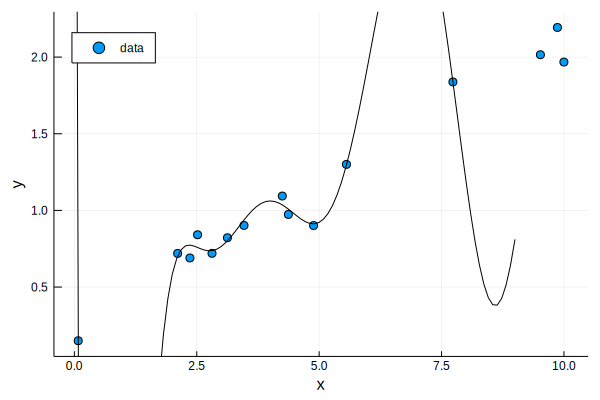

In [15]:
# plot fit
plotdata()
plotfunc(x -> p(x, order=max_order, w=w), xmin=0, xmax=9)

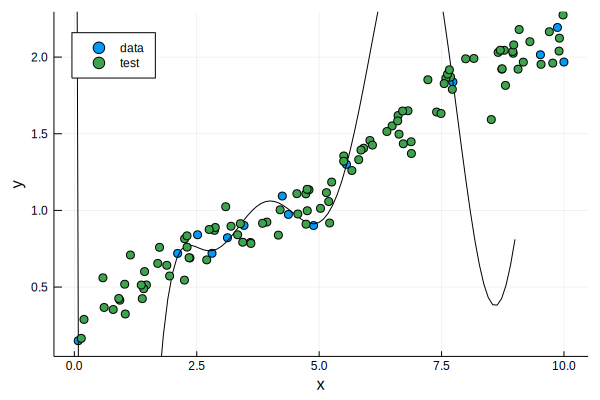

In [16]:
# plot fit on out of sample data
plotdata()
plotfunc(x -> p(x, order=max_order, w=w), xmin=0, xmax=9)

xtest,ytest = sample_data(100)
scatter!(xtest,ytest,label="test")

# Choosing the best model order

In [17]:
max_model_order = 10
rmse = zeros(max_model_order+1) # array to store root mean square model errors
xtest,ytest = sample_data(50)   # generate test set

for model_order = 0:max_model_order
    # form Vandermonde matrix
    X = zeros(n, model_order+1)
    for k=0:model_order
        X[:,k+1] = x.^k
    end
    
    # solve least squares problem
    w = X\y
    
    # compute test error
    ptest = [p(x, order=model_order, w=w) for x in xtest]
    rmse[model_order+1] = mean(abs.(ytest - ptest)) # sqrt(mean((ytest - ptest).^2))
end
rmse

11-element Array{Float64,1}:
 0.5772870857048618 
 0.09824923395887669
 0.09888541761179978
 0.09976225675607746
 0.0845898152047014 
 0.08348384084056576
 0.08592131443847713
 0.09360333517413189
 0.41136406605996567
 0.2809120873436843 
 1.3056001969642324 

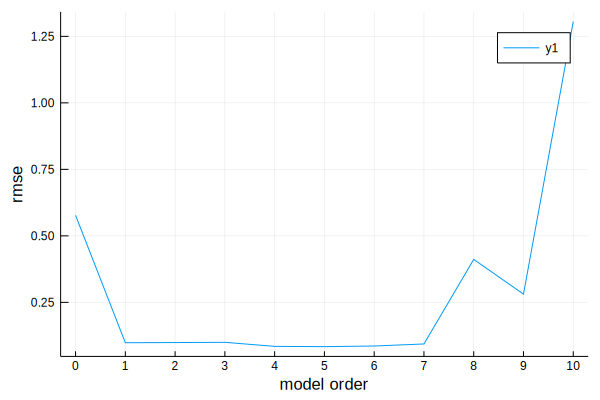

In [18]:
plot(0:max_model_order,rmse)
xticks!(0:10)
xlabel!("model order")
ylabel!("rmse")

# Polynomial models for classification

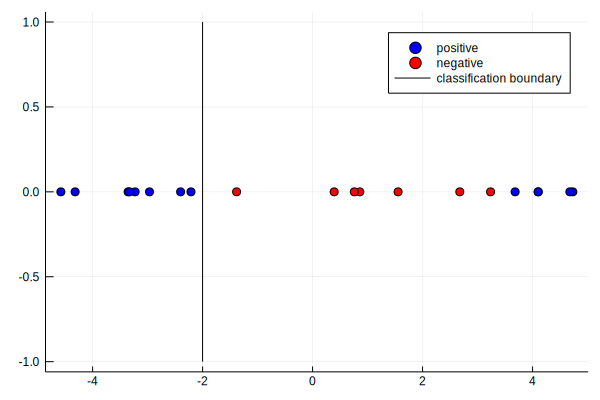

In [19]:
Random.seed!(0)
n = 20
xs = 10*(rand(n) .- .5)
ys = (xs).^2
pos = (xs .- 1).^2 .>= 7
zn=zeros(n)
pt = scatter(xs[pos],zn[pos],color="blue", label="positive")
scatter!(xs[.!pos],zn[.!pos],color="red", label="negative")
plot!([-2,-2], [-1,1], color="black", label="classification boundary")#, ticks=:none, border=:none, legend=false)
yaxis!([-1,1])
savefig("poly-class-1d.pdf")
pt

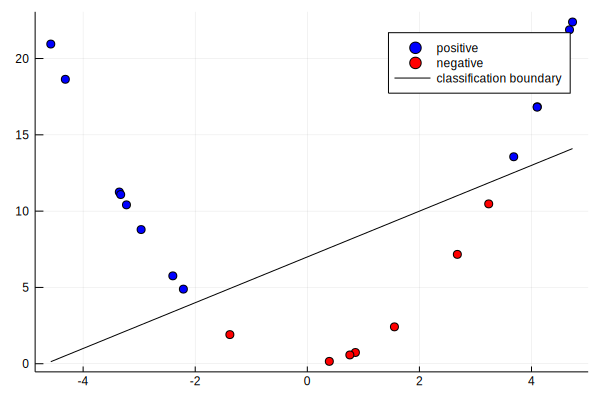

In [20]:
pt = scatter(xs[pos],ys[pos],color="blue", label="positive")
scatter!(xs[.!pos],ys[.!pos],color="red", label="negative")
plot!(xs, 1.5*xs .+ 7, color="black", label="classification boundary")
savefig("poly-class-2d.pdf")
pt

# Bootstrap estimators

In [21]:
# sample K data sets of n samples each and compute a model on each
# see how the models vary
n = 50
K = 500

models = zeros(K,2)
for k=1:K
    xk,yk = sample_data(n) # this experiment samples from the true data distribution many many times (not realistic)
    Xk = [xk ones(n)]
    wk = Xk \ yk
    models[k,:] = wk
end

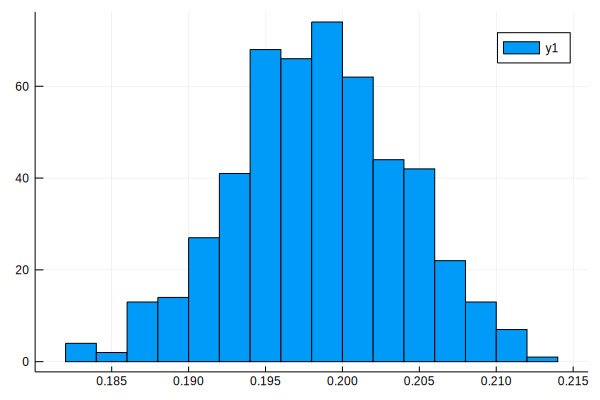

In [22]:
# histogram of the distribution of the first coefficient
# could use to compute, eg, confidence intervals

histogram(models[:,1])

In [23]:
mean(models, dims=1)

1×2 Array{Float64,2}:
 0.198437  0.224522

In [24]:
var(models,dims=1)

1×2 Array{Float64,2}:
 3.05207e-5  0.00105379

In [25]:
# can sample with replacement using rand
rand(1:20, 5)

5-element Array{Int64,1}:
 10
  1
 17
 11
 14

In [26]:
# eg,
a = .1:.1:2.0
s = rand(1:20, 5)
[s a[s]]

5×2 Array{Float64,2}:
 20.0  2.0
  3.0  0.3
 16.0  1.6
  6.0  0.6
 12.0  1.2

In [27]:
# resample K bootstrap data sets of n samples each and compute a model on each
# see how the models vary
# how does result depend on number of datapoints n? number of resamples K?
n = 50
K = 1000

x,y = sample_data(n) # this is the only data we've got!

models = zeros(K,2)
for k=1:K
    mysample = rand(1:n,n)
    xk,yk = x[mysample], y[mysample]
    Xk = [xk ones(n)]
    wk = Xk \ yk
    models[k,:] = wk
end

In [28]:
n = 5
rand(1:n,n)

5-element Array{Int64,1}:
 4
 4
 1
 2
 2

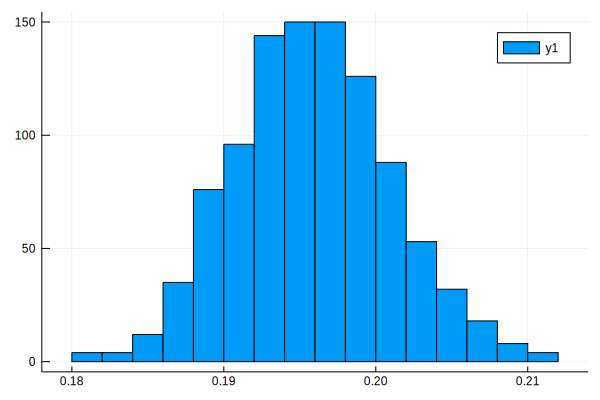

In [29]:
histogram(models[:,1])

In [30]:
mean(models,dims=1)

1×2 Array{Float64,2}:
 0.195801  0.217106

In [31]:
# as K increases, mean of the bootstrap models should converge to 
# the model fit on the original data set
X = [x ones(n)]
w = X \ y

DimensionMismatch: DimensionMismatch("vectors must have same lengths")

In [32]:
var(models,dims=1)

1×2 Array{Float64,2}:
 2.60514e-5  0.000850102